In [27]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [52]:
X,y=make_classification(n_samples=100,n_features=2,
                        n_redundant=0, n_informative=1,
                        n_classes=2,
                        n_clusters_per_class=1)


sklearn.svm.SVC : 선형 & 비선형  SVC 모형 모듈
- Linear SVM을 하고싶다면--> kernel='linear'로 설정해야 한다.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=0.2,
                                                 shuffle=True)
model_svc=SVC(C=1e10, kernel='linear').fit(X_train, y_train)
print('Learning finished!')

Learning finished!


In [53]:
model_svc.n_support_     #supprot vector 4개 (첫 class의 supprot vector의 개수는 1개,두번쨰 class의 supprot vector의 개수는 3개)

array([1, 3])

In [54]:
model_svc.n_support_.shape    # shape은 class가 두개니 2개의 값이 출력된다는 뜻 

(2,)

n_support_: support vector의 개수

In [55]:
model_svc.support_vectors_

array([[-0.86835216,  1.36767811],
       [ 0.62321999, -1.09974576],
       [ 0.59855749, -0.86866993],
       [ 0.29507555,  1.93685719]])

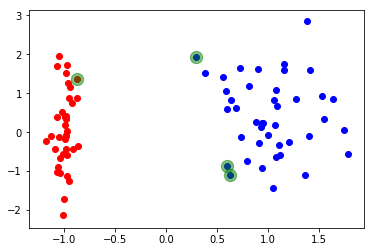

In [56]:
from matplotlib import pyplot as plt
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1],c='b')  #실제 값이 1인 애는 블루
plt.scatter(X_train[y_train==0, 0],
            X_train[y_train==0, 1],c='r')   #실제 값이 0인 애는 레드
plt.scatter(model_svc.support_vectors_[:, 0],
            model_svc.support_vectors_[:, 1],
            s=150, alpha=0.5, c='g')        #여기서의 alpha는 불투명도
plt.show()

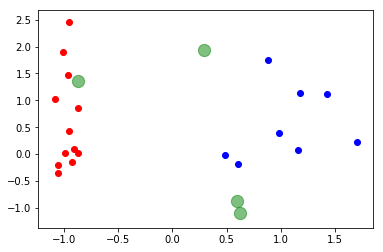

In [59]:
plt.scatter(X_test[y_test==1, 0],
            X_test[y_test==1, 1],c='b')  #실제 값이 1인 애는 블루
plt.scatter(X_test[y_test==0, 0],
            X_test[y_test==0, 1],c='r')   #실제 값이 0인 애는 레드
plt.scatter(model_svc.support_vectors_[:, 0],
            model_svc.support_vectors_[:, 1],
            s=150, alpha=0.5, c='g')        #여기서의 alpha는 불투명도
plt.show()

In [60]:
model_svc.score(X_train,y_train),model_svc.score(X_test,y_test)

(1.0, 1.0)

In [62]:
model_svc.coef_(X_test,y_test)

TypeError: 'numpy.ndarray' object is not callable

### 다른 방식으로 LinearSVM구현하기

In [63]:
from sklearn.svm import LinearSVC

In [70]:
model_svc2 = LinearSVC(C=1, loss='hinge').fit(X_train,y_train)   #여기서 뭐라고 할 지 정해줄 수 있음 loss는 힌지! 
                                                                #C는 overfitting을 막기 위해 마진의 폭을 조절 C값 자체가 마진

In [68]:
model_svc2.score(X_test,y_test)

1.0